___
# PROJETO 1

## <font color='red'>Hugo Silva Pereira Mendes</font>
___

## <font color='blue'>Jovens x Adultos x Idosos (aposentados)</font>

## Introdução

Este trabalho tem como inspiração uma charge que viralizou pelo mundo, em que era mostrado uma relação de tempo,dinheiro e energia para cada fase da vida, com o intuito de mostrar que uma das barrinhas esta quase sempre vazia. Visto isso, achei que seria muito interessante ver a real proporção entre essas variáveis, e montar uma nova charge mas dessa vez com proporções reais.

Segue abaixo o link da charge:

http://www.quironeducacao.com.br/wp-content/uploads/2015/02/tabela.jpegSSS

<img src="http://www.quironeducacao.com.br/wp-content/uploads/2015/02/tabela.jpegSSS" />


___
## Análise e Resultados

In [1]:
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

meu_diretorio = "C:/Users/Hugo/Documents/GitHub/CD/Projeto 1"
os.chdir(meu_diretorio)
dados = pd.read_csv("PES2014.csv")

Inicialmente, vamos fazer um filtro para termos um data frame para cada um dos estudados.

In [2]:
aposentados = dados[(dados.V1251 == 1) & (dados.V8005 >50)]
jovens = dados[(dados.V8005 >= 10) & (dados.V8005 <= 17)]
adultos = dados[(dados.V8005 >= 35)  & (dados.V8005 < 50)]

# Aposentados

Antes de anarlisamos nossas variáveis, precisamos primeira decidir se o primeiro filtro ja é o suficiente e está de acordo com o
que queremos analisar. Lembrando que no nosso caso, estamos estudando os aposentados idosos.

In [3]:
aposentados.V8005.describe()

count    36892.000000
mean        68.543749
std          9.206339
min         51.000000
25%         62.000000
50%         68.000000
75%         74.000000
max        112.000000
Name: V8005, dtype: float64

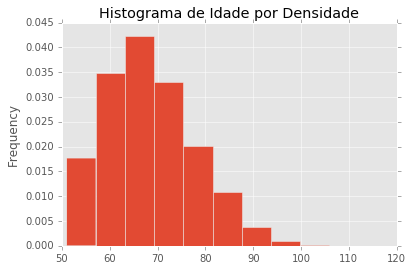

In [4]:
aposentados.V8005.plot(kind="hist",normed=1)
plt.title("Histograma de Idade por Densidade")

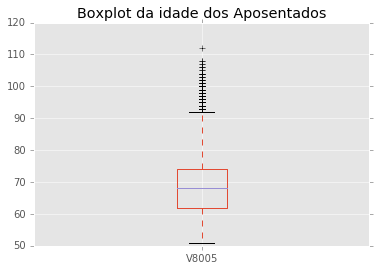

In [5]:
aposentados.V8005.plot(kind="box")
plt.title("Boxplot da idade dos Aposentados")

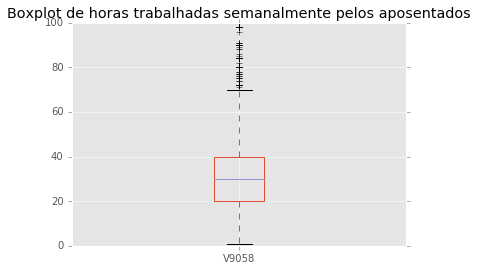

In [6]:
aposentados.V9058.plot(kind="box")
plt.title("Boxplot de horas trabalhadas semanalmente pelos aposentados")

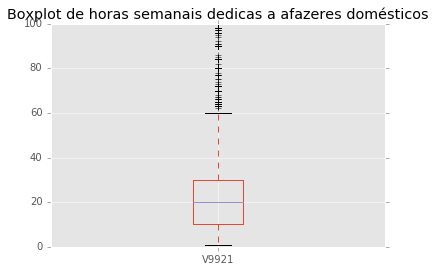

In [7]:
aposentados.V9921.plot(kind="box")
plt.title("Boxplot de horas semanais dedicas a afazeres domésticos")

Okay, até então foi possível analisar como os valores de 3 variaveis ( idade, horas trabalhadas por semana, e horas semanais dedicadas a afazeres domésticos) se comportam tratando de aposentados. Baseado nisso vamos estabelecer um novo filtro para esse grupo

In [8]:
aposentados = aposentados[(aposentados.V8005 >= 62) & (aposentados.V8005 <= 74) & (aposentados.V9058 >= 20) & (aposentados.V9058 <= 40) & (aposentados.V9921 >=5) & (aposentados.V9921 <= 20)]

Legal! Agora, vamos a novos gráficos! Para conseguirmos definir o tempo livre médio dos aposentados, vamos analisar a primeira variavel(qualitativa), tempo de percurso de casa para o trabalho. 

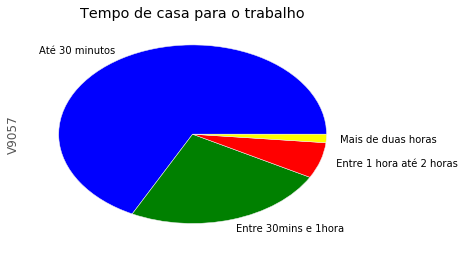

In [9]:
coluna = aposentados.V9057
colum = aposentados.V9057
coluna = coluna.astype('category')
coluna.cat.categories = ('Até 30 minutos','Entre 30mins e 1hora', " Entre 1 hora até 2 horas","Mais de duas horas")
coluna = coluna.value_counts(True)*100
coluna.plot(kind="pie",colors=("blue","green","red","yellow"))
plt.title("Tempo de casa para o trabalho")

In [10]:
print(colum.value_counts())

1.0    354
3.0    128
5.0     34
7.0      8
Name: V9057, dtype: int64


In [11]:
caminho = (354*0.5 + 128*0.75 + 34*1.5 + 8*2)/(354+128+34+8)*2
trampo = np.average(aposentados.V9058/7)
afazeres = np.average(aposentados.V9921/7)
tempo_livre = 18 - caminho - trampo - afazeres
print(tempo_livre)

10.4843574808


Os aposentados tem em média 10,48 horas livres. Temos nosso primeiro dado!

Agora ainda precisamos descobrir mais 2 variáveis a respeito dos aposentados. Renda média e Energia (que logo menos explicarei como será calculada). Por agora, vamos nos concentrar nas análises para a Renda Média dos aposentados.

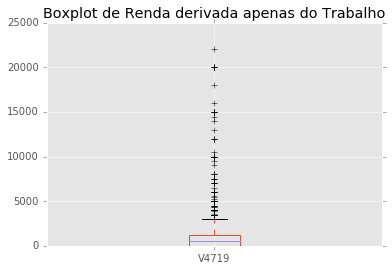

In [12]:
aposentados = aposentados[(aposentados.V1252 < 10000) &  (aposentados.V4719 < 30000)] #ese filtro foi só para tirar os que não declararam nada
aposentados.V4719.plot(kind='box')
plt.title('Boxplot de Renda derivada apenas do Trabalho')

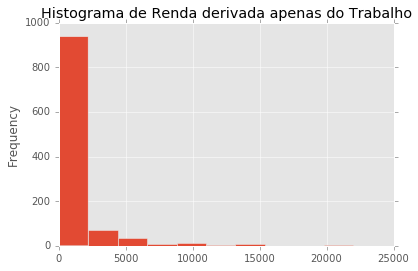

In [13]:
aposentados.V4719.plot(kind='hist')
plt.title('Histograma de Renda derivada apenas do Trabalho')

Com este histograma podemos indentificar uma forte assimetria a direita, que poderá nos atrapalhar na hora de tirar a média das rendas totais. Vamos fazer mais um filtro e replotar o histograma para ver se a assimetria não está tão acentuada.

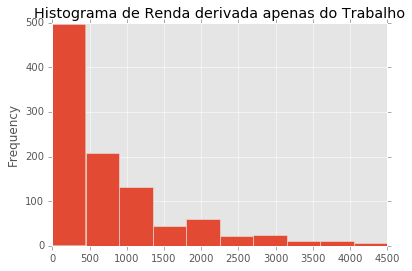

In [14]:
aposentados = aposentados[(aposentados.V4719 < 5000)]
aposentados.V4719.plot(kind='hist')
plt.title('Histograma de Renda derivada apenas do Trabalho')

Apesar de ainda haver  uma assimetria a direita, conseguimos excluir os casos "super aberrantes" do histograma anteriro que poderiam pesar muito a média para cima. Em seqûencia, vamos analisar a renda derivada apenas da aposentadoria.

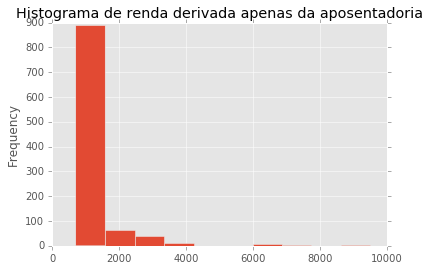

In [15]:
aposentados.V1252.plot(kind='hist')
plt.title ( "Histograma de renda derivada apenas da aposentadoria")

É, optamos por fazer um histograma antes do bloxpot dessa vez, e logo de cara é perceptível que podemos fazer um bom filtro a partir de 4000 reais.

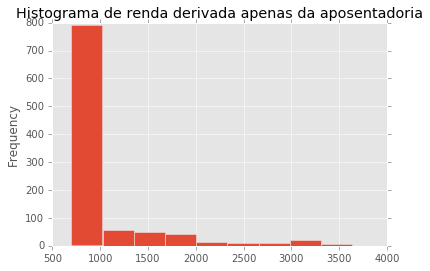

In [16]:
aposentados = aposentados[(aposentados.V1252 < 4000)]
aposentados.V1252.plot(kind='hist')
plt.title ( "Histograma de renda derivada apenas da aposentadoria")

É... talvez, a partir de 1500 seja mais apropriado.

Novamente, a assimetria continua, mas menos "aberrante" do que a anterior. Legal, estamos prontos para calcular a renda média derivada de todas as fontes do grupo de aposentados.

In [17]:
aposentados = aposentados[(aposentados.V4720 < 500000)] #Esse filtro é so para desconsiderar os não declarados
aposentados_renda = aposentados.V4720.mean()
print(aposentados_renda)

1784.254509018036


Uhuuuul! Temos o nosso segundo dado a respeito dos aposentados! A renda média ( 1784 reais).

Agora vem a explicação de como será calculado a energia. Como não nenhum dado a respeito de energia que poderiamos ultilizar. Será usada a seguinte formula para calcular a "energia" de cada grupo: (idade_media_dogrupo^-1)*100. Vamos la:

In [18]:
media_deidade_aposentados = aposentados.V8005.mean()
print(media_deidade_aposentados, " anos")
print((1/media_deidade_aposentados)*100 , " 'constante de energia'")

67.06112224448898  anos
1.4911769539946507  'constante de energia'


# Jovens

Para os jovens será usado basicamente o mesmo procedimento ultilizado para os aposentados, então para evitar repetições a explicação ser menos detalhada. Vamos começar com o tempo_livre novamente:

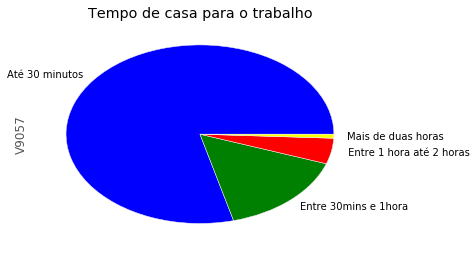

In [19]:
coluna = jovens.V9057
coluna = coluna.astype('category')
coluna.cat.categories = ('Até 30 minutos','Entre 30mins e 1hora', " Entre 1 hora até 2 horas","Mais de duas horas")
coluna = coluna.value_counts(True)*100
coluna.plot(kind="pie",colors=("blue","green","red","yellow"))
plt.title("Tempo de casa para o trabalho")

In [20]:
coluna = jovens.V9057
coluna.value_counts()

1.0    2945
3.0     581
5.0     173
7.0      27
Name: V9057, dtype: int64

In [21]:
media_caminho = ((2945*0.5 + 581*0.75 + 173*1.5 + 27*2)*2)/(2945+581+173+41170)
print(((2945*0.5 + 581*0.75 + 173*1.5)*2)/(2945+581+173+41170))

0.09662573268849317


C:\Users\Hugo\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


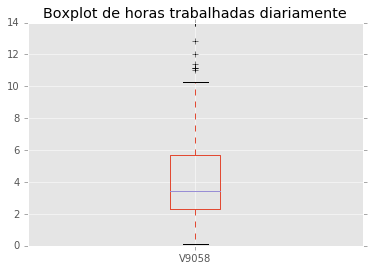

In [22]:
jovens.V9058 = jovens.V9058/7
jovens.V9058.plot(kind='box')
plt.title("Boxplot de horas trabalhadas diariamente")

C:\Users\Hugo\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


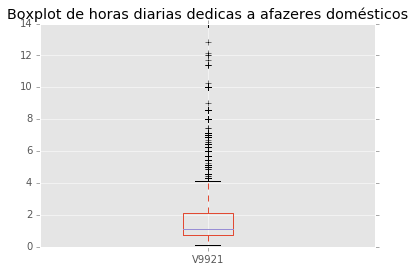

In [23]:
jovens.V9921 = jovens.V9921/7
jovens.V9921.plot(kind='box')
plt.title("Boxplot de horas diarias dedicas a afazeres domésticos")

Estamos caminhando mais rapido dessa vez, mas decidi dar uma pausa aqui pois nos deparamos novamente com um  caso de aberrância que é bem inconveniente para nós! Vamos fazer um histograma e analisar melhor qual seria um filtro adequado. 

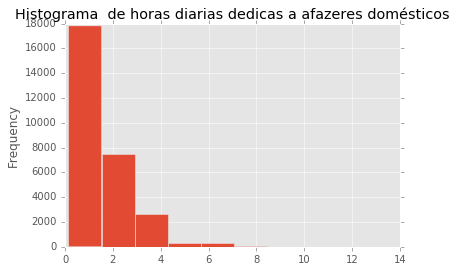

In [24]:
jovens.V9921.plot(kind='hist')
plt.title("Histograma  de horas diarias dedicas a afazeres domésticos")

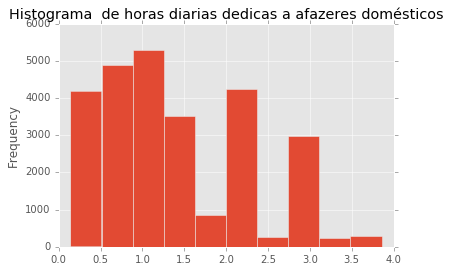

In [25]:
jovens = jovens[(jovens.V9921 < 4)]
jovens.V9921.plot(kind='hist')
plt.title("Histograma  de horas diarias dedicas a afazeres domésticos")

Bem melhor não ?! Bom, estamos pronto para calcular o tempo livre dos jovens.

In [26]:
tempo_usado = ((jovens.V9921 + jovens.V9058).mean() + media_caminho)/2
tempo_livre1 = 12- tempo_usado
print(tempo_livre1)


9.548665049930433


Uhul! Aí esta o primeiro dado a respeito dos dados jovens! O tempo livre de um jovem é de aproximadamente 9,54 horas. 
O segundo dado ( renda média)  será mais facil de analisar em relação ao dos aposentados pois não será necessario dividir em renda derivada apenas da aposentadoria e renda deriada apenas do trabalho. Bom, vamos la.

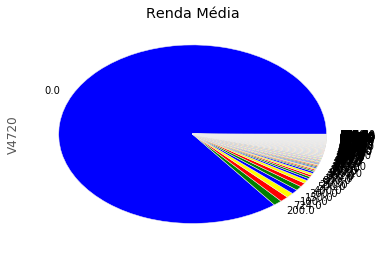

In [27]:
jovens = jovens[(jovens.V4720 < 600000)]
coluna = jovens.V4720
coluna = coluna.value_counts()
coluna.plot(kind="pie",colors=("blue","green","red","yellow"))
plt.title("Renda Média")

In [28]:
jovens.V4720.mean()

58.09402509833302

KKKKK! Bom acho que aqui chegamos a conclusão óbvia que a maioria dos jovens não trabalham por isso sua renda é 0. O que pushou a renda média para baixo. Mas do mesmo jeito, conseguimos o segundo dado, a renda média dos jovens em geral é de 58 reais! kk Mas para efeito de análise vamos filtrar os que trabalham e ver como o histograma se comporta!

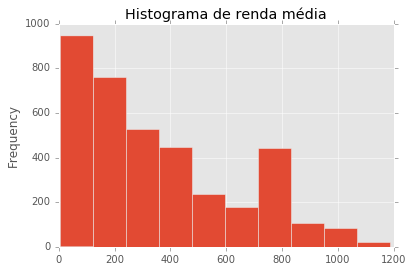

In [66]:
jovens = jovens[(jovens.V4720 < 1200) & (jovens.V4720 >0)]
jovens.V4720.plot(kind='hist')  
plt.title("Histograma de renda média")


In [30]:
jovens.V4720.mean()

350.5102748865759

350 reais é a renda média entre os que trabalham. Mesmo não usando isso é um dado interessante de se observar. Agora vamos ao terceiro e ultimo dado dos jovens, a "energia".

In [31]:
media = jovens.V8005.mean()
energia_dos_jovens = (1/media)*100
print((1/media)*100)

6.70688050404525


# Adultos

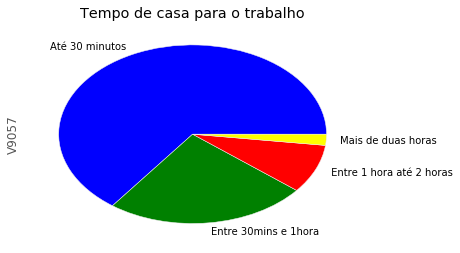

In [32]:
coluna = adultos.V9057
coluna = coluna.astype('category')
coluna.cat.categories = ('Até 30 minutos','Entre 30mins e 1hora', " Entre 1 hora até 2 horas","Mais de duas horas")
colum = adultos.V9057
coluna = coluna.value_counts(True)*100
coluna.plot(kind="pie",colors=("blue","green","red","yellow"))
plt.title("Tempo de casa para o trabalho")

In [33]:
colum.value_counts()

1.0    30203
3.0    11361
5.0     4117
7.0      934
Name: V9057, dtype: int64

In [34]:
horas_Caminho = ((51685*0.5+19565*0.75 + 7039*1.5 + 1589*2)/(51685+19565+7039+1589))*2
print(((51685*0.5+19565*0.75 + 7039*1.5 + 1589*2)/(51685+19565+7039+1589))*2)

1.3583902952001803


C:\Users\Hugo\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


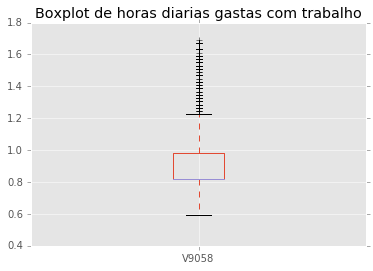

In [65]:
adultos.V9058 = adultos.V9058/7
adultos.V9058.plot(kind='box')
plt.title('Boxplot de horas diarias gastas com trabalho')

C:\Users\Hugo\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


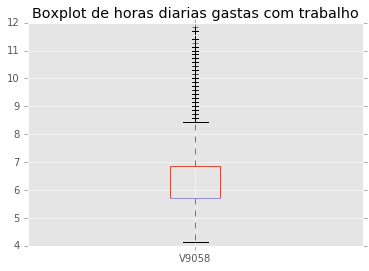

In [64]:
adultos.V9058 = adultos.V9058[(adultos.V9058 > 4) & (adultos.V9058 < 12)]
adultos.V9058.plot(kind='box')
plt.title('Boxplot de horas diarias gastas com trabalho')

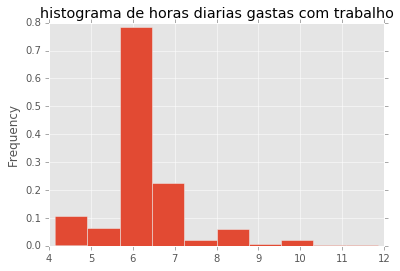

In [62]:
adultos.V9058.plot(kind='hist',normed=1)
plt.title('histograma de horas diarias gastas com trabalho')

In [38]:
horas_trabalhadas= 8
adultos.V9058.mean()

6.193762196352538

C:\Users\Hugo\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


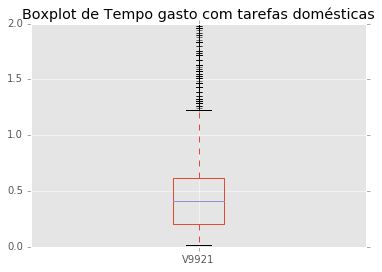

In [61]:
adultos.V9921 = adultos.V9921/7
adultos.V9921.plot(kind='box')
plt.title("Boxplot de Tempo gasto com tarefas domésticas")

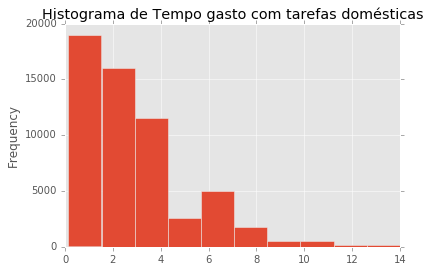

In [60]:
adultos.V9921.plot(kind='hist')
plt.title("Histograma de Tempo gasto com tarefas domésticas")

In [41]:
horas_afazeres = 2.9
tempo_livre = 18 - horas_afazeres - horas_trabalhadas - horas_Caminho
print(tempo_livre)

5.741609704799819


Foi nosso terceiro grupo estudado. E seguimos o mesmo padrão dos outros dois. Então dessa vez passamos sem muita explicações ja que o metodo foi o mesmo. E como visto a cima, o primeiro dado dos adultos é o tempo livre (5.74 horas). Vamos para a renda média dos adultos.

In [42]:
adultos.V4720 = adultos.V4720[(adultos.V4720 >0) & (adultos.V4720 < 10000)]

C:\Users\Hugo\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


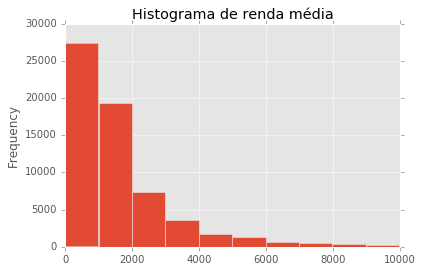

In [59]:
adultos.V4720.plot(kind='hist')
plt.title("Histograma de renda média")

In [44]:
adultos.V4720.mean()

1549.1407675899345

O segundo dado dos adultos esta concluido. Aproximadamente 1549 reais de renda média! Vamos ao nosso ULTIMO dado da tabela que ainda falta: A "energia" dos adultos!  E logo então, faremos uma conclusão com base nisso!

In [46]:
media = adultos.V8005.mean()
energia_dos_adultos = (1/media)*100
print((1/media)*100)

2.396089340890053


UHUUUUL! Nosso 9º dado da tabela foi obtido! Vamos finalmente a conclusão!

___
## Conclusão 

A imagem original é a seguinte:

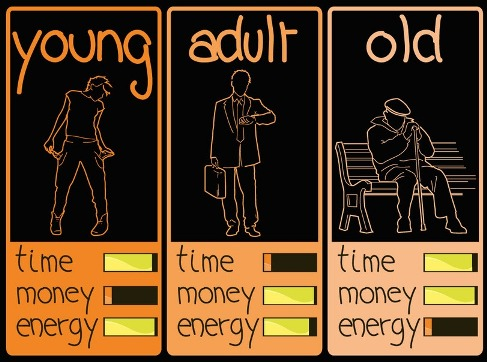

In [57]:
from IPython.display import Image
Image("tabela1.jpeg")

E a partir de nossas análises, chegamos a seguinte tabela :

In [56]:
def tableIt(data):
    for lin in data:
        print("+-------"*len(lin)+"+")
        for inlin in lin:
            print("|",str(inlin),"", end="")
        print("|")
    print("+-------"*len(lin)+"+")

data = [[9.54,5.7,10.48],[58,1549,1748],[6.7,2.39,1.48]]

tableIt(data)


+-------+-------+-------+
| 9.54 | 5.7 | 10.48 |
+-------+-------+-------+
| 58 | 1549 | 1748 |
+-------+-------+-------+
| 6.7 | 2.39 | 1.48 |
+-------+-------+-------+


Considerando os maiores valores como 100% e construindo as demais barras com base nesse maior valor, chegamos a seguinte nova imagem:

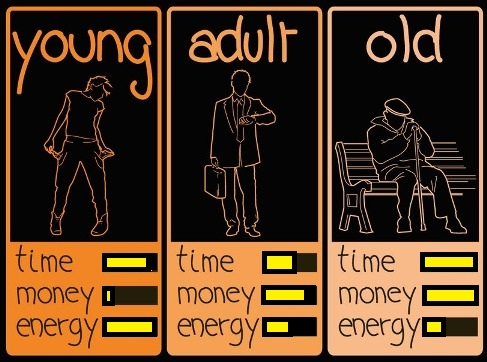

In [58]:
Image("tabela.jpeg")